In [5]:
# Magic home
%cd /home/benjamin/git/swiss-river-network-benchmark/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# nicer labels for plots
label = dict()
label['concatenation_embedding'] = 'Concatenation'
label['concatenation_embedding_output'] = 'Output Concatenation'
label['embedding_gate_memory'] = 'Gated Memory'
label['embedding_gate_hidden'] = 'Gated State'
label['interpolation_embedding'] = 'α-regulated'
label['swiss-1990'] = 'Swiss 1990'
label['swiss-2010'] = 'Swiss 2010'
label['zurich'] = 'Zurich'
    
# Variables
GRAPH_NAME = ['swiss-1990', 'swiss-2010', 'zurich'][0]
#METHODS = ['concatenation_embedding', 'concatenation_embedding_output', 'embedding_gate_memory', 'embedding_gate_hidden', 'interpolation_embedding']
#METHODS = ['concatenation_embedding', 'embedding_gate_memory', 'embedding_gate_hidden', 'interpolation_embedding']
METHODS = ['concatenation_embedding', 'interpolation_embedding']
METRIC = ['RMSE', 'MAE', 'NSE'][1]
EXPORT_PGF = False



/home/benjamin/git/swiss-river-network-benchmark


In [6]:
# Read all runs and sort them by validation_mse
from swissrivernetwork.benchmark.ray_evaluation_embedding import experiment_analysis_single_model

def summarize_top(trials_df, top_n):
    # assume trials_df is sorted ascending
    top = trials_df.head(top_n)
    stats = {
        "mean": top["validation_mse"].mean(),
        "median": top["validation_mse"].median(),
        "std": top["validation_mse"].std(),
        "min": top["validation_mse"].min(),
        "max": top["validation_mse"].max(),
    }

    return top[["trial_id", "validation_mse", "config/batch_size", "config/window_len", "config/learning_rate", "config/embedding_size", "config/hidden_size"]], stats

def epoch_stats(trial_dfs, epoch):
    epoch_mses = []
    for key in dfs.keys():
        if len(dfs[key]) >= epoch:
            epoch_mses.append(dfs[key].iloc[epoch-1]['validation_mse'])
    epoch_mses = [mse for mse in epoch_mses if mse <= 1.5] # filter outliers
    stats = {
        "n": len(epoch_mses),
        "mean": np.mean(epoch_mses),
        "median": np.median(epoch_mses),
        "std": np.std(epoch_mses),
        "min": np.min(epoch_mses),
        #"max": np.max(epoch_mses),        
    }
    return stats

for method in METHODS:
    VERBOSE = True
    analysis = experiment_analysis_single_model(GRAPH_NAME, method)
        
    df = analysis.dataframe(metric="validation_mse", mode="min")

    df = df.sort_values("validation_mse").reset_index(drop=True)

    #df.info()
    print(f"~~~ Stats for {method}: ~~~")

    for head in [1, 10, 30, 50, 80, 100]:
        top_head, stats_head = summarize_top(df, head)
        print(f'Stats (Top {head})', stats_head)


# Analyze Specific Epoch:
for method in METHODS:
    analysis = experiment_analysis_single_model(GRAPH_NAME, method)
    #df = analysis.dataframe()
    dfs = analysis.trial_dataframes
    #print(dfs.keys())
    print(f"~~~ Epoch Stats for {method}: ~~~")

    for epoch in range(1, 51):
        stats = epoch_stats(dfs, epoch)
        print(f'Stats (Epoch {epoch})', stats)
    

    




~~~ Stats for concatenation_embedding: ~~~
Stats (Top 1) {'mean': 0.40051320841303095, 'median': 0.40051320841303095, 'std': nan, 'min': 0.40051320841303095, 'max': 0.40051320841303095}
Stats (Top 10) {'mean': 0.4133498122479068, 'median': 0.41525393728807103, 'std': 0.006238179966513923, 'min': 0.40051320841303095, 'max': 0.42008685995824635}
Stats (Top 30) {'mean': 0.4201208823758255, 'median': 0.4226494620379526, 'std': 0.006089112926599185, 'min': 0.40051320841303095, 'max': 0.4259050812688656}
Stats (Top 50) {'mean': 0.42342918750538955, 'median': 0.4248202434682753, 'std': 0.006316236869071989, 'min': 0.40051320841303095, 'max': 0.4315035999461543}
Stats (Top 80) {'mean': 0.4288709934709914, 'median': 0.42816248296003323, 'std': 0.009003098098408383, 'min': 0.40051320841303095, 'max': 0.4462640546262264}
Stats (Top 100) {'mean': 0.4387106445903191, 'median': 0.43170602644386236, 'std': 0.025900392009520764, 'min': 0.40051320841303095, 'max': 0.5737820501090027}
~~~ Stats for inte

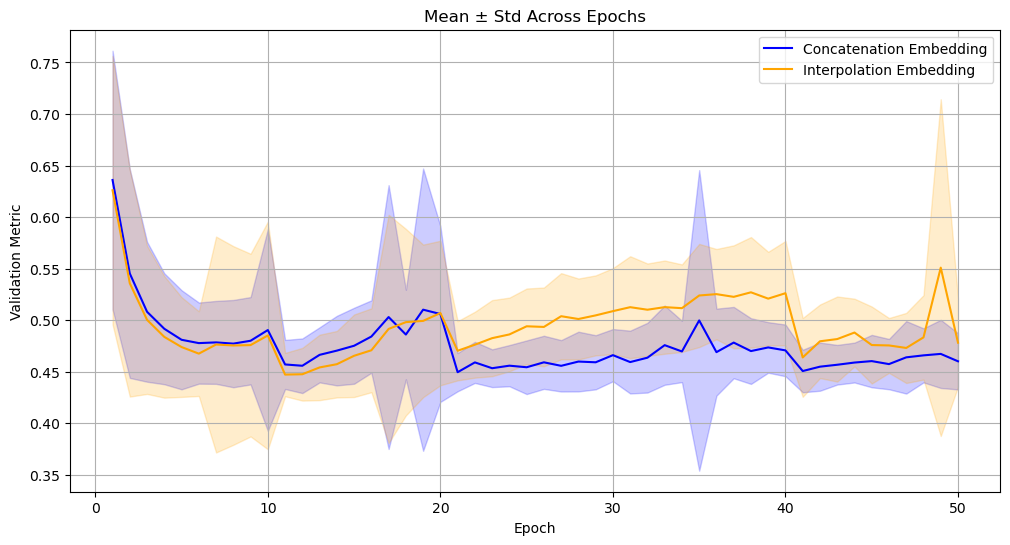

In [8]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 51))

# Mean and std for concatenation_embedding
concat_mean = [
    0.6359975806092303,0.5452341534593143,0.5081196946601267,0.4916349412052659,
    0.4809726023152259,0.47774022454342974,0.47843453675688413,0.4772494521978043,
    0.4800255089572565,0.4904131863301397,0.45702856433691774,0.45577116017143166,
    0.46635124257188587,0.470449509782137,0.47517592193647984,0.48411226935407264,
    0.5030156209788711,0.48604919983061134,0.5101858705399892,0.5059769090091678,
    0.4495217189073123,0.45903174081306336,0.4533786924455651,0.45584874822007904,
    0.45432268172832363,0.4591058414807776,0.45571173069442417,0.4598404435560547,
    0.459136113281905,0.4660578187015037,0.4593506382095964,0.4635979229383843,
    0.4757491307342813,0.46963648327477536,0.4997462833351973,0.4689816223496261,
    0.4782472239555015,0.47001156154793633,0.4735482981713075,0.47067551379020894,
    0.4506425246104805,0.454879120128074,0.4567427045387578,0.45887979845671606,
    0.4602842010499444,0.45737926620899494,0.4639346076130298,0.465853549310446,
    0.46727872665441184,0.4601030777557753
]
concat_std = [
    0.12541213503067883,0.10125634172427596,0.06785055840532178,0.053797348532088854,
    0.04807073252458091,0.03935228690645244,0.040229328920039206,0.04234240615595132,
    0.04238432305151535,0.09785939177232542,0.023805937624644877,0.02649401977736422,
    0.02673631844165901,0.03374224357242234,0.03686496327416065,0.03513139350323499,
    0.12799766930465367,0.043425849456362055,0.1369443595477437,0.085263908104655,
    0.018516814732955737,0.019925375837044835,0.018315316451605786,0.01998261065925418,
    0.026015242397534076,0.025773036895793154,0.024932257088242652,0.028975204213762783,
    0.026259341430440838,0.025315676272142953,0.030468300505915966,0.03384016920039801,
    0.03844475904771902,0.02974714865965198,0.14581045214496735,0.04219880387925544,
    0.03460067990881976,0.03186559331945097,0.02453083560302964,0.025059967262351553,
    0.02061736914415732,0.023360977322735677,0.019230828495108074,0.01933524025959402,
    0.025419519320051456,0.024406648761440747,0.03516246257272142,0.026217667481387607,
    0.03307294639963568,0.027289929277026774
]

# Mean and std for interpolation_embedding
interp_mean = [
    0.6260653991301991,0.5357669103256253,0.5002994193366818,0.4837676439019193,
    0.47392500799056864,0.46752932442965783,0.4763702190157346,0.47543900884828827,
    0.4758156277171207,0.48518202058446436,0.44719165665010224,0.44753709039796374,
    0.4541453034093138,0.4572804853451089,0.4654516082031478,0.4707815283050877,
    0.4915105565043632,0.49808136929786995,0.4992953113389376,0.5069274446730561,
    0.4703175019531045,0.4761933531946852,0.48254777198308146,0.48616142367391146,
    0.4940622714755591,0.4934431979578221,0.5038421733988798,0.5011259016799159,
    0.5046415608536335,0.5087513757374836,0.5126020173498546,0.5101405633613467,
    0.5126381094451062,0.5116420308002393,0.5239430741364087,0.5252562258116852,
    0.5226293239531131,0.5270278540954582,0.520884943288126,0.5261620306287353,
    0.46385701834515203,0.4795096915428682,0.48166513833469554,0.487987786657565,
    0.4758689075242728,0.47548266225203406,0.4730451321374858,0.4832973673765082,
    0.5509741780813784,0.47815759232616983
]
interp_std = [
    0.13015306912508526,0.10990730804573261,0.07187204949937351,0.05895554215071558,
    0.04839369695383284,0.04108931937717738,0.1047310353602749,0.09636910862510692,
    0.08862664740299787,0.11042264741769937,0.021022143963297227,0.025571275389820094,
    0.03175045684727838,0.03224823976361581,0.04002457278959553,0.040686951624263896,
    0.11069034833108955,0.09047625325180833,0.07400271557232503,0.07010209244124188,
    0.028734835254348532,0.03197649540174575,0.03692475817033222,0.03572224166602902,
    0.03665244648446185,0.0382165869798049,0.041789378519460824,0.03925987093253149,
    0.03879400667228564,0.041741466527022375,0.04943197867510372,0.044827579322256804,
    0.04523044943362844,0.04246419372982333,0.05005122397922246,0.04379981913444006,
    0.049960886006278536,0.05359680322612584,0.04541868978234773,0.05065630070689299,
    0.03823720856932592,0.03567237030816321,0.04127513780246655,0.032854918752384575,
    0.037359473881001456,0.026608032018093444,0.03400247075833958,0.04093579995859602,
    0.16337999843675824,0.04271761170138873
]

# Plot mean ± std
plt.figure(figsize=(12,6))
plt.plot(epochs, concat_mean, label="Concatenation Embedding", color='blue')
plt.fill_between(epochs, [m-s for m,s in zip(concat_mean, concat_std)], 
                 [m+s for m,s in zip(concat_mean, concat_std)], color='blue', alpha=0.2)

plt.plot(epochs, interp_mean, label="Interpolation Embedding", color='orange')
plt.fill_between(epochs, [m-s for m,s in zip(interp_mean, interp_std)], 
                 [m+s for m,s in zip(interp_mean, interp_std)], color='orange', alpha=0.2)

plt.xlabel("Epoch")
plt.ylabel("Validation Metric")
plt.title("Mean ± Std Across Epochs")
plt.legend()
plt.grid(True)
plt.show()


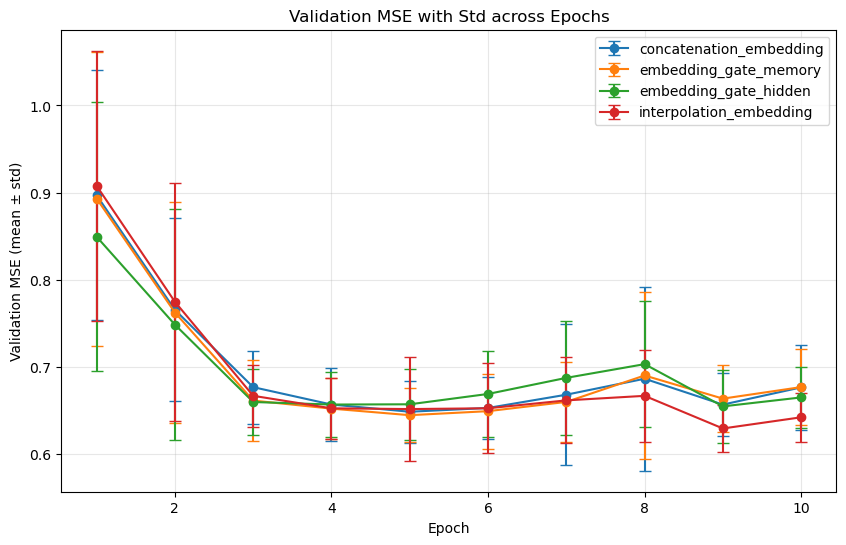

In [7]:
import matplotlib.pyplot as plt

# Data: mean and std per epoch
data = {
    "concatenation_embedding": {
        "mean": [0.896955, 0.765647, 0.677035, 0.657117, 0.648862,
                 0.653199, 0.668397, 0.686687, 0.657043, 0.676788],
        "std":  [0.143211, 0.104760, 0.041721, 0.041918, 0.035663,
                 0.035414, 0.080976, 0.105434, 0.036390, 0.048603],
    },
    "embedding_gate_memory": {
        "mean": [0.893212, 0.762592, 0.661665, 0.652421, 0.644917,
                 0.649521, 0.660132, 0.690420, 0.663886, 0.677110],
        "std":  [0.168451, 0.127057, 0.046448, 0.034693, 0.031202,
                 0.043094, 0.045696, 0.096130, 0.038332, 0.043271],
    },
    "embedding_gate_hidden": {
        "mean": [0.849462, 0.748656, 0.660018, 0.657104, 0.657397,
                 0.669248, 0.687700, 0.703413, 0.655011, 0.665255],
        "std":  [0.153932, 0.132070, 0.037591, 0.036965, 0.040446,
                 0.048784, 0.065098, 0.072550, 0.041628, 0.035298],
    },
    "interpolation_embedding": {
        "mean": [0.907790, 0.774894, 0.667127, 0.652781, 0.651922,
                 0.652843, 0.661883, 0.667082, 0.629679, 0.642499],
        "std":  [0.154876, 0.136238, 0.035764, 0.034721, 0.060042,
                 0.051545, 0.049259, 0.052863, 0.027473, 0.028020],
    }
}

epochs = np.arange(1, 11)

plt.figure(figsize=(10,6))
for label, values in data.items():
    means = values["mean"]
    stds = values["std"]
    plt.errorbar(epochs, means, yerr=stds, capsize=4, marker="o", label=label)

plt.title("Validation MSE with Std across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation MSE (mean ± std)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()